In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("heart.csv.txt")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# So all the features are numerical 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.shape

(303, 14)

In [6]:
data.isnull().sum() # No null NaN are present

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
y=data['target']

In [8]:
# finding the discrete numerical features
discrete_features=[]
import numpy as np
for feature in data.columns:
    if feature !='target':
        if len(data[feature].unique())<=25:
            discrete_features.append(feature)
            print(f"{feature} has {len(data[feature].unique())} unique values")

sex has 2 unique values
cp has 4 unique values
fbs has 2 unique values
restecg has 3 unique values
exang has 2 unique values
slope has 3 unique values
ca has 5 unique values
thal has 4 unique values


In [9]:
numerical_features=[feature for feature in data.columns if feature not in discrete_features and feature !='target']
numerical_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [10]:
# Checking the balance of the dataset
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

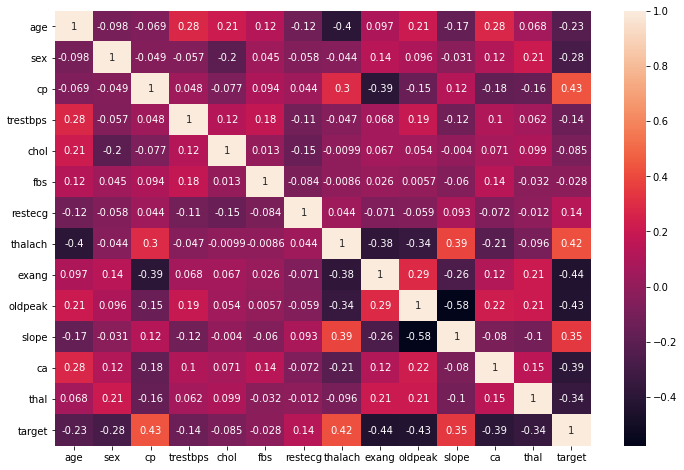

In [12]:
# Correlation among the features
fig= plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

In [13]:
# Slope and oldpeak are having a negative correlation
# Age and thalach are having a negative correlation 
# cp and exang are having a negative correlation 
# thalach and exang are having a negative correlation 
# cp and thalach are having a positive correlation with the target
# # exang and oldpeak are having a positive correlation with the target

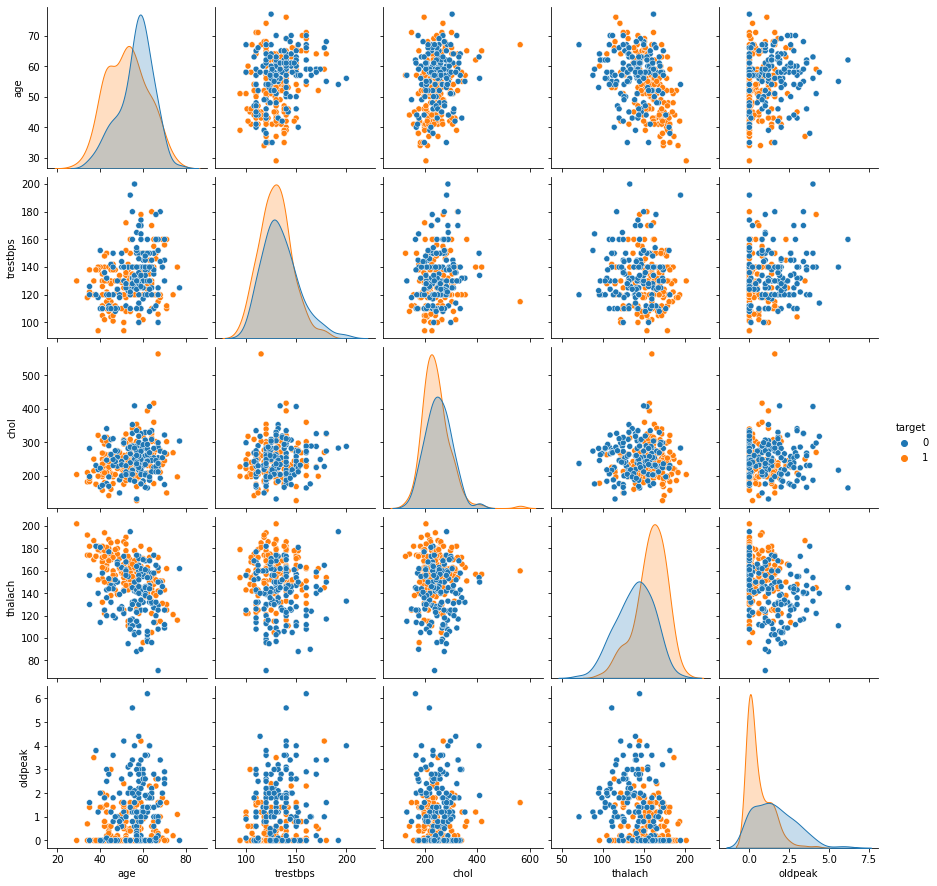

In [14]:
sns.pairplot(data[numerical_features+['target']],hue='target')

In [15]:
 # From the pairplot it is seen that if age is less and thalach is high then the patient can has a heart disease

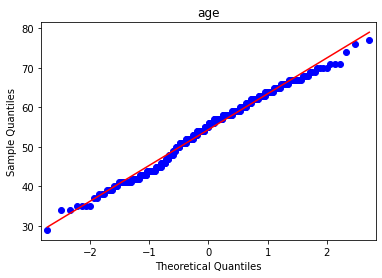

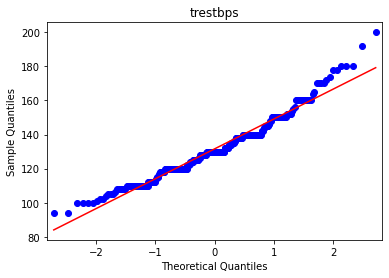

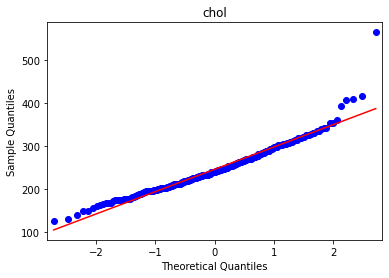

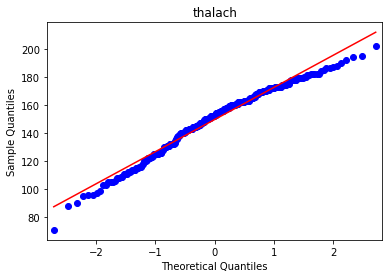

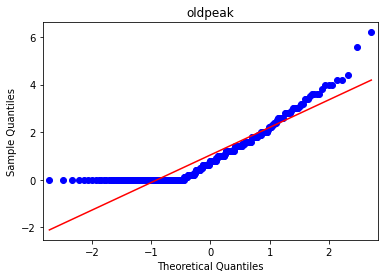

In [16]:
# The dataset is balanced 
# Checking the distribution of the numerical features
import statsmodels.api as sm
for feature in numerical_features:
    sm.qqplot(data[feature],line='s')
    plt.title(feature)
    plt.show()

In [17]:
# threshbps and oldpeaks may not be following a normal distribution 
def Display_Hist(data,feature_lst):
    for feature in feature_lst:
        sns.histplot(data=data,x=feature,kde=True)
        plt.show()

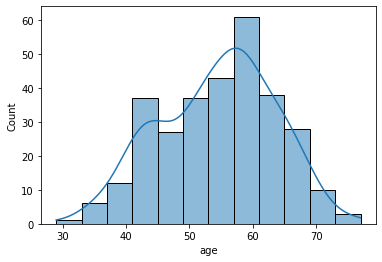

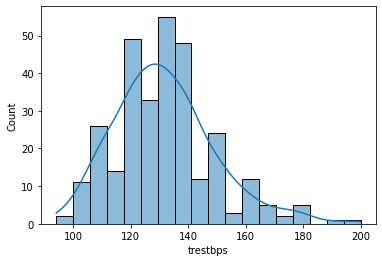

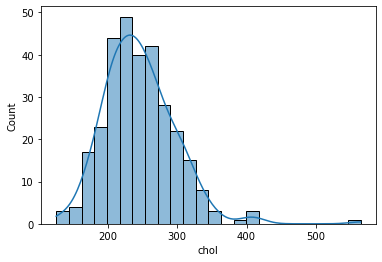

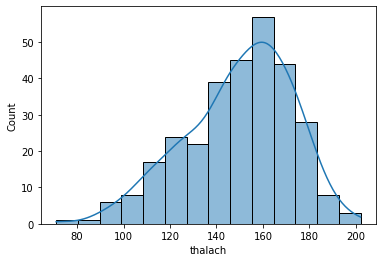

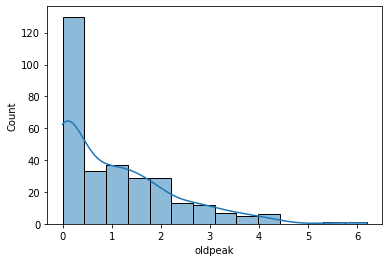

In [18]:
Display_Hist(data,numerical_features)

In [19]:
def Display_Box(data,feature_lst):
    for feature in feature_lst:
        sns.boxplot(y=feature,data=data)
        plt.show()

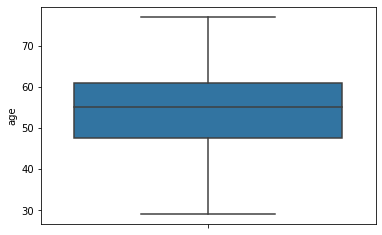

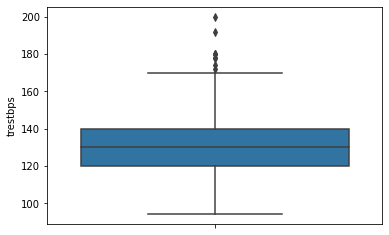

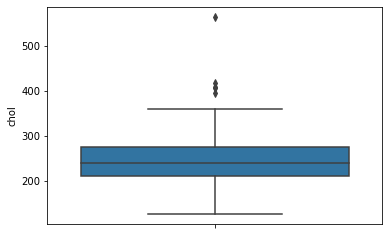

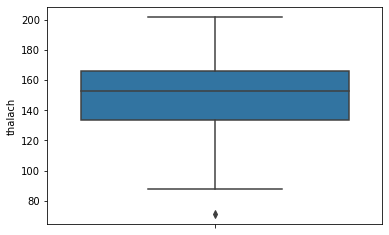

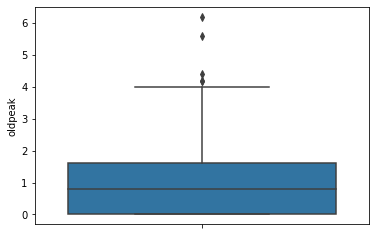

In [20]:
Display_Box(data,numerical_features)

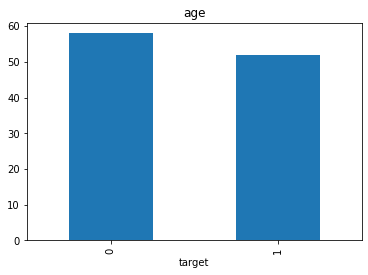

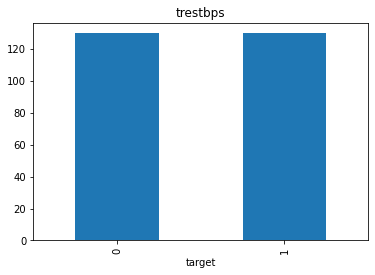

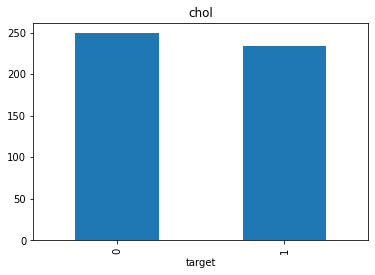

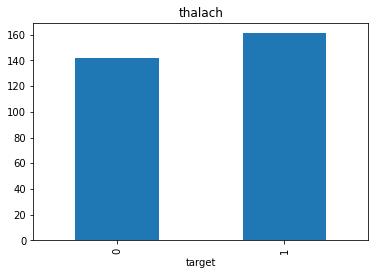

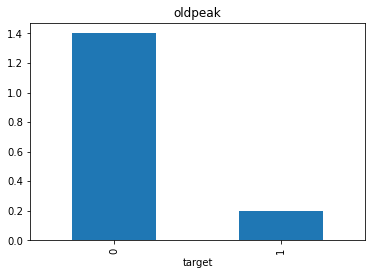

In [21]:
for feature in numerical_features:
    data.groupby(['target']).median()[feature].plot.bar()
    plt.title(feature)
    plt.show()

In [22]:
# The median of oldpeak of a heart disease patient is near 0.2 and a noraml person is 1.4
# high cp and thalach is responsible for heart disease
# The avg thalach of a normal person is near 140 and the avg thalach of a patient with heart disease is near 160

<AxesSubplot:xlabel='slope', ylabel='oldpeak'>

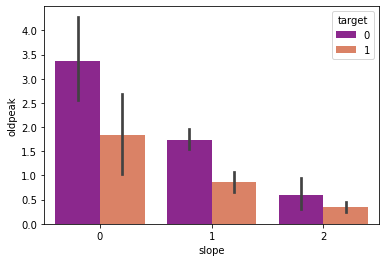

In [23]:
# Analysing the median of oldpeak in each category of slope wrt target
sns.barplot(x ='slope', y ='oldpeak', data = data, palette ='plasma', hue='target',estimator = np.mean)

<AxesSubplot:xlabel='slope', ylabel='thalach'>

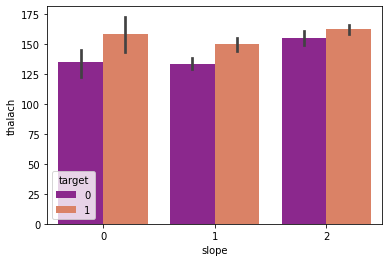

In [24]:
# Analysing the median of thalach in each category of slope wrt target
sns.barplot(x ='slope', y ='thalach', data = data, palette ='plasma', hue='target',estimator = np.mean)

In [25]:
# Finding the outliers in the continuous features
def IQR(data,feature):
    outliers=[]
    q1,q3=np.percentile(data[feature],[25,75])
    upper=q3+1.5*(q3-q1)
    lower=q1-1.5*(q3-q1)
    for val in data[feature]:
        if val<lower or val>upper:
            outliers.append(val)
    return outliers

In [26]:
for feature in numerical_features:
    out=IQR(data,feature)
    print(f"{feature} has {len(out)} outliers")

age has 0 outliers
trestbps has 9 outliers
chol has 5 outliers
thalach has 1 outliers
oldpeak has 5 outliers


In [27]:
# Checking the complete record of outliers
def Outlier_Record(data,iqr,feature):
    record=[]
    for i in range(len(data[feature])):
        if data.loc[i,feature] in iqr:
            record.append(data.loc[i,:])
    return record

In [28]:
pd.DataFrame(Outlier_Record(data,IQR(data,'trestbps'),'trestbps'),columns=data.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,2.0,0.0,3.0,1.0
101,59.0,1.0,3.0,178.0,270.0,0.0,0.0,145.0,0.0,4.2,0.0,0.0,3.0,1.0
110,64.0,0.0,0.0,180.0,325.0,0.0,1.0,154.0,1.0,0.0,2.0,0.0,2.0,1.0
203,68.0,1.0,2.0,180.0,274.0,1.0,0.0,150.0,1.0,1.6,1.0,0.0,3.0,0.0
223,56.0,0.0,0.0,200.0,288.0,1.0,0.0,133.0,1.0,4.0,0.0,2.0,3.0,0.0
241,59.0,0.0,0.0,174.0,249.0,0.0,1.0,143.0,1.0,0.0,1.0,0.0,2.0,0.0
248,54.0,1.0,1.0,192.0,283.0,0.0,0.0,195.0,0.0,0.0,2.0,1.0,3.0,0.0
260,66.0,0.0,0.0,178.0,228.0,1.0,1.0,165.0,1.0,1.0,1.0,2.0,3.0,0.0
266,55.0,0.0,0.0,180.0,327.0,0.0,2.0,117.0,1.0,3.4,1.0,0.0,2.0,0.0


In [29]:
data1=data.copy()
# Replacing the outliers of the features based on the eda and domain knowledge

In [30]:
out=IQR(data1,'trestbps')
for i in range(len(data1['trestbps'])):
    if data1.loc[i,'trestbps'] in out:
        data1.loc[i,'trestbps']=np.percentile(data['trestbps'],95)

IQR(data1,'trestbps')

[]

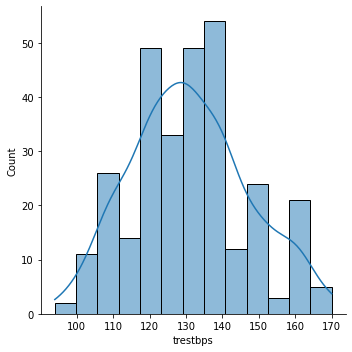

In [31]:
sns.displot(data=data1,x='trestbps',kde=True)

In [32]:
pd.DataFrame(Outlier_Record(data,IQR(data,'chol'),'chol'),columns=data.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65.0,0.0,2.0,140.0,417.0,1.0,0.0,157.0,0.0,0.8,2.0,1.0,2.0,1.0
85,67.0,0.0,2.0,115.0,564.0,0.0,0.0,160.0,0.0,1.6,1.0,0.0,3.0,1.0
96,62.0,0.0,0.0,140.0,394.0,0.0,0.0,157.0,0.0,1.2,1.0,0.0,2.0,1.0
220,63.0,0.0,0.0,150.0,407.0,0.0,0.0,154.0,0.0,4.0,1.0,3.0,3.0,0.0
246,56.0,0.0,0.0,134.0,409.0,0.0,0.0,150.0,1.0,1.9,1.0,2.0,3.0,0.0


In [33]:
out=IQR(data1,'chol')
for i in range(len(data1['chol'])):
    if data1.loc[i,'chol'] in out:
        data1.loc[i,'chol']=np.percentile(data['chol'],90)

IQR(data1,'chol')

[]

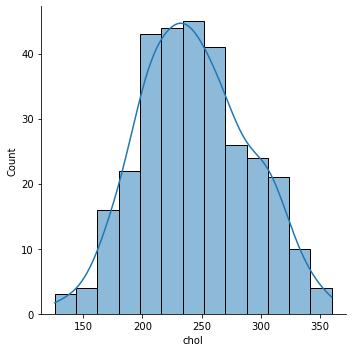

In [34]:
sns.displot(data=data1,x='chol',kde=True)

In [35]:
pd.DataFrame(Outlier_Record(data,IQR(data,'thalach'),'thalach'),columns=data.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67.0,1.0,0.0,120.0,237.0,0.0,1.0,71.0,0.0,1.0,1.0,0.0,2.0,0.0


In [36]:
pd.DataFrame(Outlier_Record(data,IQR(data,'oldpeak'),'oldpeak'),columns=data.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59.0,1.0,3.0,178.0,270.0,0.0,0.0,145.0,0.0,4.2,0.0,0.0,3.0,1.0
204,62.0,0.0,0.0,160.0,164.0,0.0,0.0,145.0,0.0,6.2,0.0,3.0,3.0,0.0
221,55.0,1.0,0.0,140.0,217.0,0.0,1.0,111.0,1.0,5.6,0.0,0.0,3.0,0.0
250,51.0,1.0,0.0,140.0,298.0,0.0,1.0,122.0,1.0,4.2,1.0,3.0,3.0,0.0
291,58.0,1.0,0.0,114.0,318.0,0.0,2.0,140.0,0.0,4.4,0.0,3.0,1.0,0.0


In [37]:
out=IQR(data1,'oldpeak')
for i in range(len(data1['oldpeak'])):
    if data1.loc[i,'oldpeak'] in out and data1.loc[i,'target']==0:
        data1.loc[i,'oldpeak']=np.percentile(data['oldpeak'],95)
    elif data1.loc[i,'oldpeak'] in out and data1.loc[i,'target']==1:
        data1.loc[i,'oldpeak']=0.8

IQR(data1,'oldpeak')

[]

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

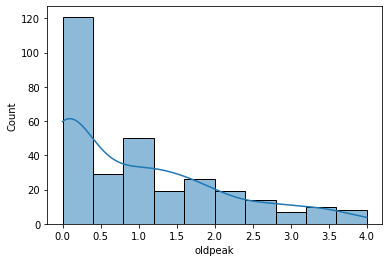

In [38]:
sns.histplot(data1[['oldpeak']],x='oldpeak',kde=True)

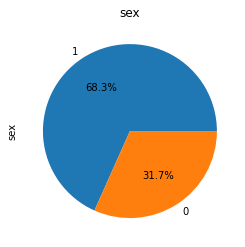

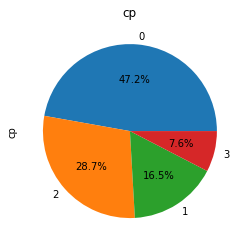

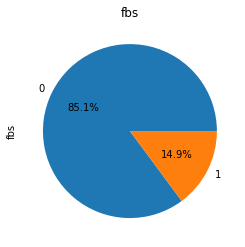

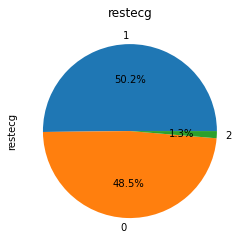

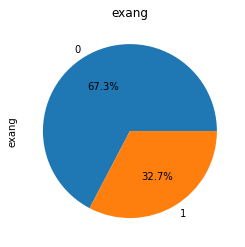

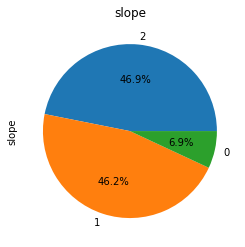

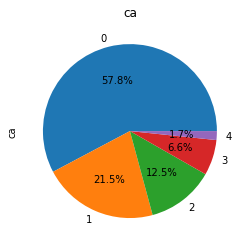

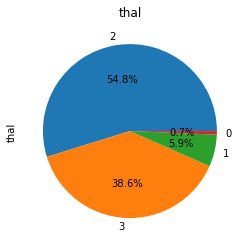

In [39]:
for feature in discrete_features:
    data1[feature].value_counts().plot.pie(autopct='%.1f%%')
    plt.title(feature)
    plt.show()

In [63]:
X=data1.drop(['target','chol','fbs'],axis=1)
Y=data1['target']
X.shape,Y.shape

((303, 11), (303,))

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 11), (61, 11), (242,), (61,))

In [65]:
from sklearn.preprocessing import MinMaxScaler
mms2=MinMaxScaler()
X_train_scale=mms2.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scale,columns=X_train.columns)
X_test_scale=mms2.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scale,columns=X_train.columns)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xg

In [67]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
ada=AdaBoostClassifier()
svc=SVC()
knn=KNeighborsClassifier()
xgb=xg.XGBClassifier()
scores=[[],[],[],[],[],[],[],[]]
classifiers=[lr,dt,rf,gb,ada,svc,knn,xgb]
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_train_scaled):
    X_train_fold, X_test_fold = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    for index,model in enumerate (classifiers):
        model.fit(X_train_fold,y_train_fold)
        p=model.predict(X_test_fold)
        acc=accuracy_score(y_test_fold,p)
        scores[index].append(acc)

C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [68]:
for index,each in enumerate(scores):
    print(f"KFold accuracies of {classifiers[index]} : {each}")

KFold accuracies of LogisticRegression() : [0.7959183673469388, 0.8367346938775511, 0.7708333333333334, 0.8541666666666666, 0.75]
KFold accuracies of DecisionTreeClassifier() : [0.7142857142857143, 0.7346938775510204, 0.8125, 0.7708333333333334, 0.7291666666666666]
KFold accuracies of RandomForestClassifier() : [0.7959183673469388, 0.8571428571428571, 0.8541666666666666, 0.8125, 0.7916666666666666]
KFold accuracies of GradientBoostingClassifier() : [0.7959183673469388, 0.8367346938775511, 0.8125, 0.8125, 0.6875]
KFold accuracies of AdaBoostClassifier() : [0.7346938775510204, 0.7959183673469388, 0.75, 0.8125, 0.7916666666666666]
KFold accuracies of SVC() : [0.8163265306122449, 0.8163265306122449, 0.8333333333333334, 0.7708333333333334, 0.7291666666666666]
KFold accuracies of KNeighborsClassifier() : [0.8571428571428571, 0.7755102040816326, 0.8125, 0.7291666666666666, 0.7291666666666666]
KFold accuracies of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
            

In [69]:
# Getting mean of each models
for index,each in enumerate(scores):
    print(f"Mean of KFold accuracies of {classifiers[index]} : {np.mean(each)*100}")

Mean of KFold accuracies of LogisticRegression() : 80.15306122448979
Mean of KFold accuracies of DecisionTreeClassifier() : 75.2295918367347
Mean of KFold accuracies of RandomForestClassifier() : 82.22789115646258
Mean of KFold accuracies of GradientBoostingClassifier() : 78.9030612244898
Mean of KFold accuracies of AdaBoostClassifier() : 77.69557823129252
Mean of KFold accuracies of SVC() : 79.31972789115646
Mean of KFold accuracies of KNeighborsClassifier() : 78.06972789115646
Mean of KFold accuracies of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_wei

In [70]:
# Checking the vairance in the accuracies of each model
for index,each in enumerate(scores):
    m=np.mean(each)
    var=0
    for x in each:
        var=var + (x-m)*(x-m)
    v=var/len(each)
    print(f"Vairance in KFold accuracies of {classifiers[index]} : {v}")

Vairance in KFold accuracies of LogisticRegression() : 0.001527821162478596
Vairance in KFold accuracies of DecisionTreeClassifier() : 0.001251547387662548
Vairance in KFold accuracies of RandomForestClassifier() : 0.0007919877134527275
Vairance in KFold accuracies of GradientBoostingClassifier() : 0.0027466420241566017
Vairance in KFold accuracies of AdaBoostClassifier() : 0.0008704127909667259
Vairance in KFold accuracies of SVC() : 0.0014561785598593193
Vairance in KFold accuracies of KNeighborsClassifier() : 0.0024386106483409694
Vairance in KFold accuracies of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_sta

In [71]:
# Based on the mean and variance of K fold accuracies of each model
# Selecting Gradient Boosting,Ada Boost and Random Forest
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [72]:
from sklearn.metrics import roc_curve,roc_auc_score
def Threshold_Accuracy(model,X_test_scaled,y_test):
    pred_proba=model.predict_proba(X_test_scaled)[:,1]
#     auc_xg = roc_auc_score(y_test, pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
    accuracy_ls,fp,fn,tp,tn = [],[],[],[],[]
    for thres in thresholds:
        y_pred = np.where(pred_proba>thres,1,0)
        accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
        fp.append(confusion_matrix(y_test,y_pred)[1,0])
        fn.append(confusion_matrix(y_test,y_pred)[0,1])
        tn.append(confusion_matrix(y_test,y_pred)[1,1])
        tp.append(confusion_matrix(y_test,y_pred)[0,0])
    accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(tp), pd.Series(fn),pd.Series(fp),pd.Series(tn),pd.Series(accuracy_ls)],
                            axis=1)
    return accuracy_ls

In [73]:
# Gradient Boosting 
gb=GradientBoostingClassifier()
gb.fit(X_train_scaled,y_train)
gb_pred=gb.predict(X_test_scaled)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.8032786885245902
[[24  5]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [74]:
accuracy_ls=Threshold_Accuracy(gb,X_test_scaled,y_test)
accuracy_ls.columns = ['thresholds','True Positive','False Negative','False Positive','True Negative','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(7)

,thresholds,True Positive,False Negative,False Positive,True Negative,accuracy
14,0.058712,22,7,2,30,0.852459
9,0.659122,26,3,8,24,0.819672
11,0.535667,25,4,7,25,0.819672
8,0.671534,26,3,9,23,0.803279
10,0.569668,25,4,8,24,0.803279
12,0.496394,24,5,7,25,0.803279
13,0.465679,23,6,6,26,0.803279


In [75]:
# Random Forest
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
rf_pred=rf.predict(X_test_scaled)
print(accuracy_score(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

0.819672131147541
[[24  5]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [76]:
accuracy_ls=Threshold_Accuracy(rf,X_test_scaled,y_test)
accuracy_ls.columns = ['thresholds','True Positive','False Negative','False Positive','True Negative','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(7)

,thresholds,True Positive,False Negative,False Positive,True Negative,accuracy
21,0.30,23,6,2,30,0.868852
20,0.41,24,5,3,29,0.868852
22,0.28,22,7,2,30,0.852459
23,0.15,20,9,1,31,0.836066
19,0.58,26,3,7,25,0.836066
17,0.65,27,2,8,24,0.836066
16,0.68,28,1,9,23,0.836066


In [79]:
# Logistic Regression 
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)
lr_pred=lr.predict(X_test_scaled)
print(accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

0.9016393442622951
[[26  3]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [80]:
accuracy_ls=Threshold_Accuracy(lr,X_test_scaled,y_test)
accuracy_ls.columns = ['thresholds','True Positive','False Negative','False Positive','True Negative','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(7)

,thresholds,True Positive,False Negative,False Positive,True Negative,accuracy
9,0.487514,26,3,3,29,0.901639
8,0.520577,26,3,4,28,0.885246
10,0.447496,25,4,3,29,0.885246
7,0.665631,27,2,10,22,0.803279
6,0.671446,27,2,11,21,0.786885
5,0.728397,28,1,13,19,0.770492
11,0.128594,17,12,2,30,0.770492


In [81]:
# SVC 
svc=SVC()
svc.fit(X_train_scaled,y_train)
svc_pred=svc.predict(X_test_scaled)
print(accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

0.8852459016393442
[[26  3]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [86]:
import pickle
pickle.dump(mms2,open("heart_scaler.pkl",'wb'))
pickle.dump(lr, open("heart_model.pkl", 'wb'))

In [87]:
X_train.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120.0,1,162,0,0.0,2,0,2
202,58,1,0,150.0,0,111,1,0.8,2,0,3
196,46,1,2,150.0,1,147,0,3.6,1,0,2
75,55,0,1,135.0,0,161,0,1.4,1,0,2
176,60,1,0,117.0,1,160,1,1.4,2,2,3
